<a href="https://colab.research.google.com/github/dumbled00r/OOP.Lab.20222.20214944.HoangDuyAnh/blob/main/Breast%20Cancer%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries and load datas

In [601]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [602]:
# Load data
from google.colab import files
# uploaded = files.upload()
df = pd.read_csv('/content/data.csv')
df.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


#Data Visualizing and Preprocessing

In [603]:
# Count the number of rows and columns in the dataset
df.shape

(569, 33)

In [604]:
# Count the number of empty (NaN, NAN, na) values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [605]:
# Drop the column with all missing values and store to the original dataframe
df = df.dropna(axis=1)

In [606]:
# Get the new count of the number of rows and columns
df.shape

(569, 32)

In [607]:
# Count number of Malognant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

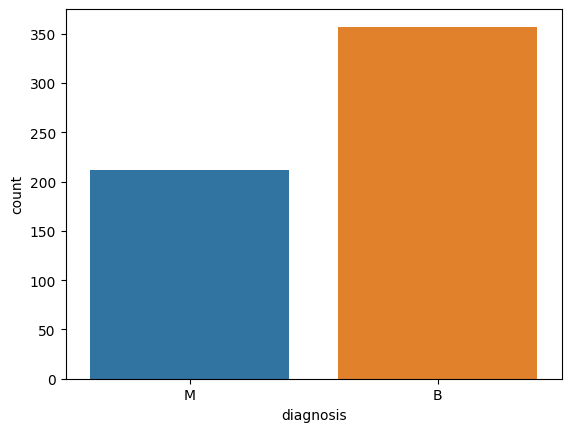

In [608]:
# Visualize the count of Benign vs Malignent
sns.countplot(x = df['diagnosis'], data = df)

In [609]:
# Data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [610]:
# Encode the categorical data values (M --> 1, B --> 0)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

<ipython-input-610-b86726a0c4ca>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)


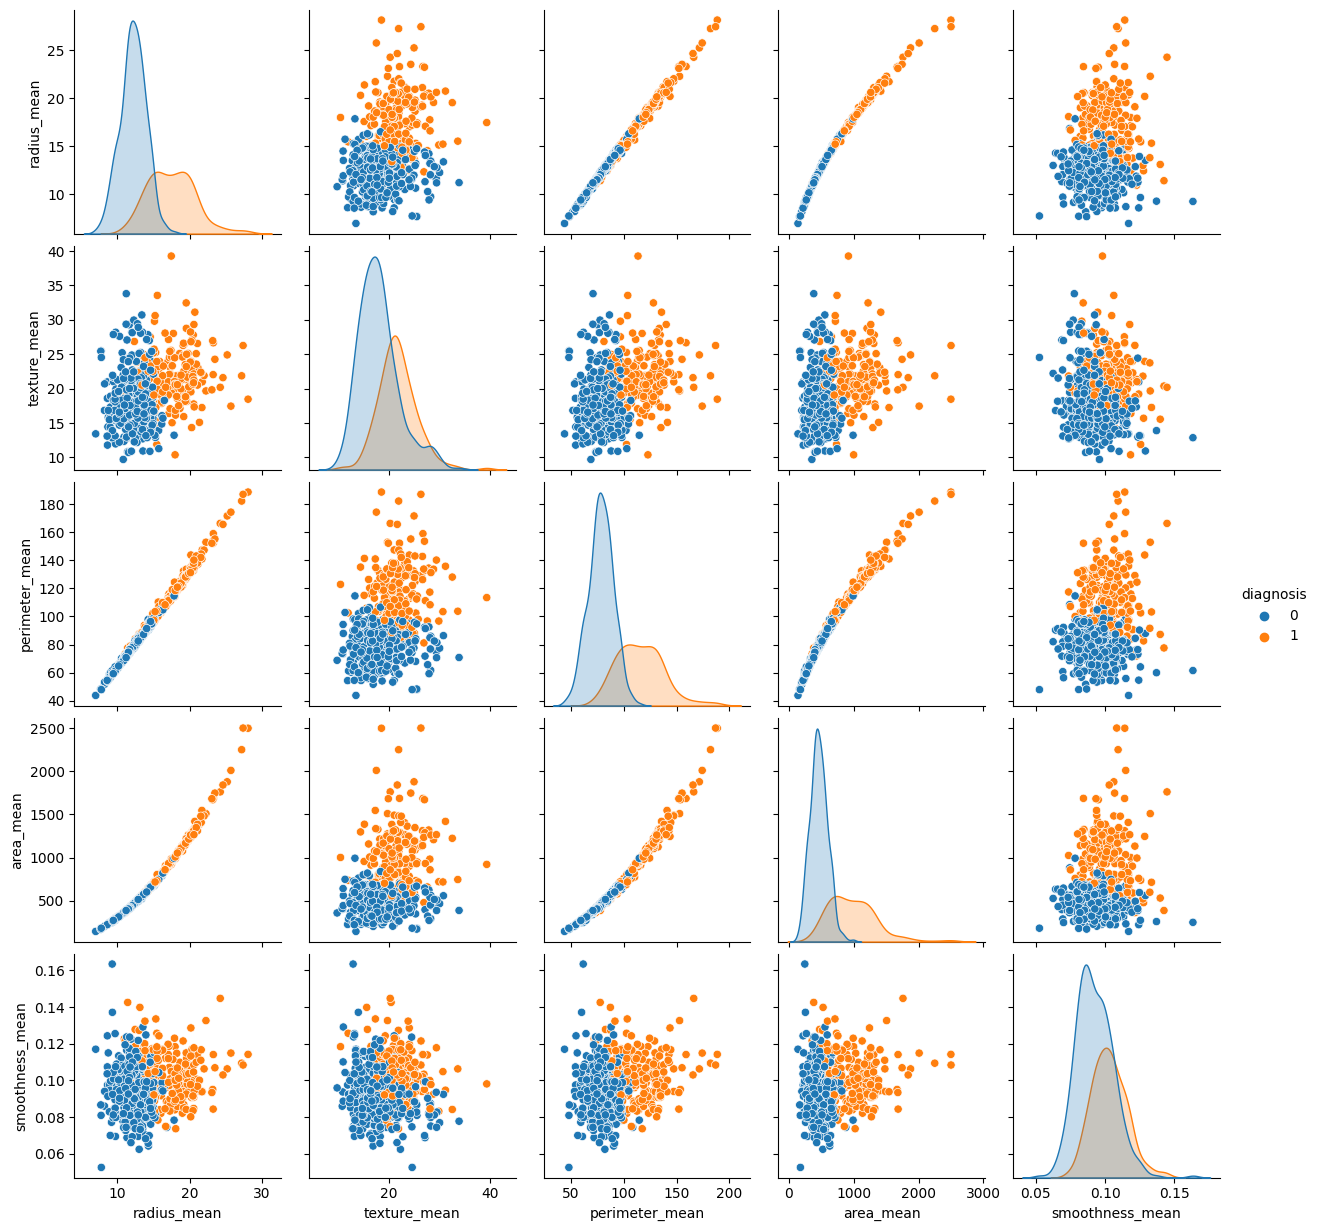

In [611]:
# Create a pair plot
sns.pairplot(df.iloc[:, 1:7], hue = 'diagnosis')

In [612]:
# Print the first 5 rows of the new data (After processing)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [613]:
# Get the correlation of the columns
df.iloc[:, 1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

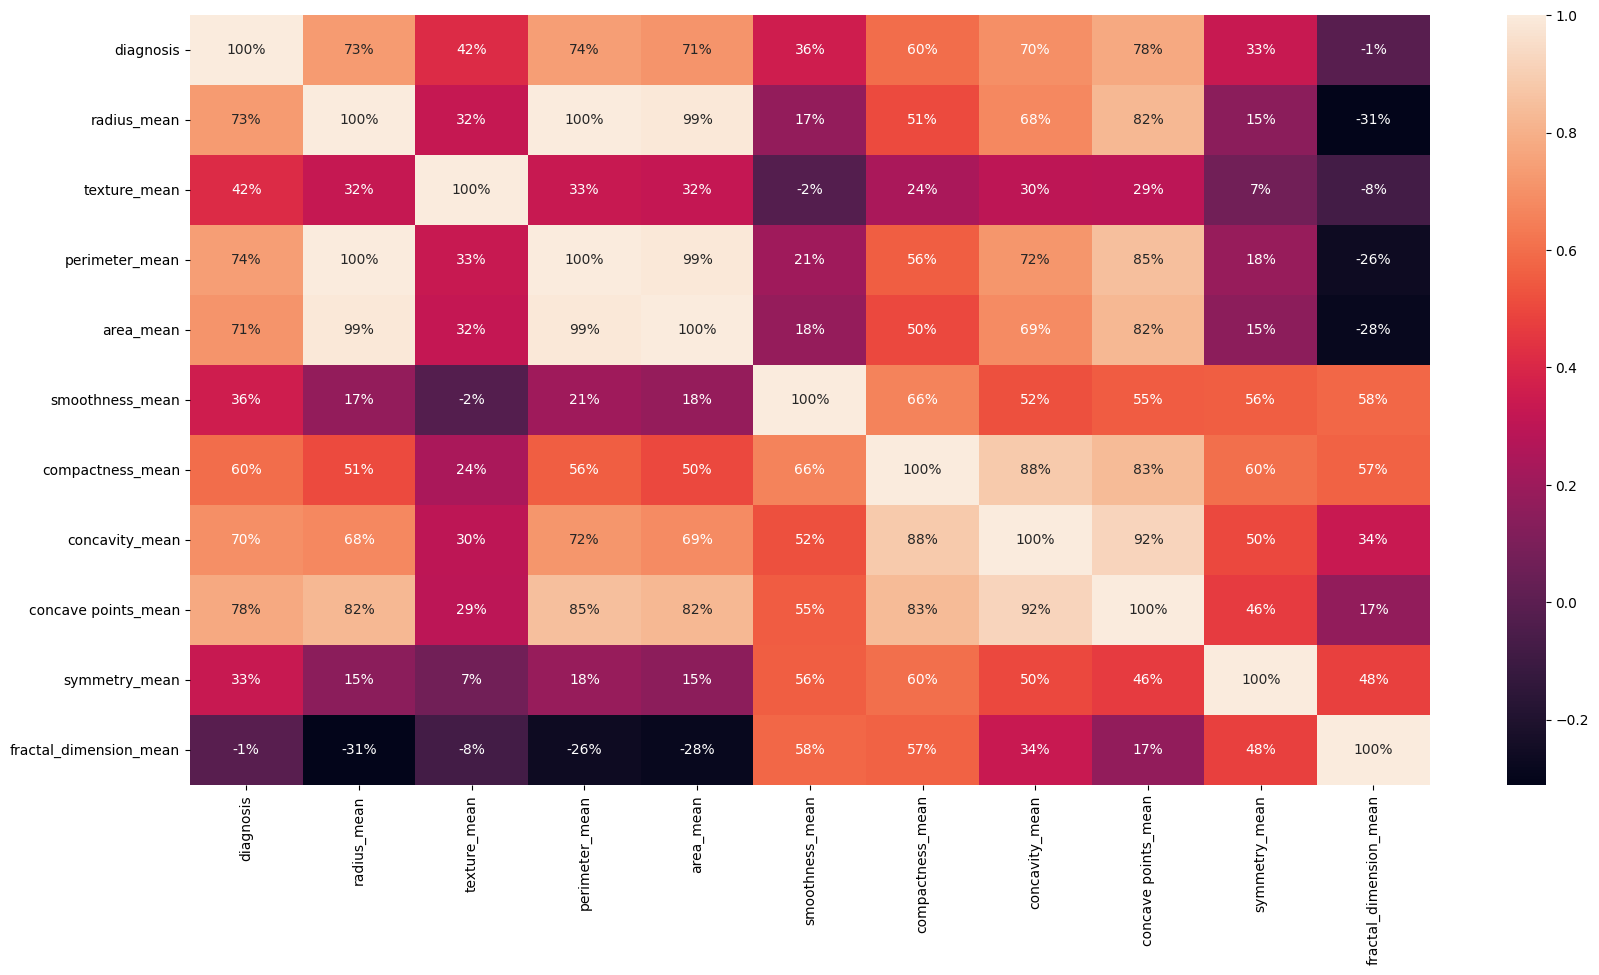

In [614]:
# Visualize the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.iloc[:, 1:12].corr(), annot = True, fmt = ".0%")

#Data splitting

In [615]:
# Split the data set into independent variable (X) and dependent variable (Y) data sets
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values

In [616]:
# Split the data set
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
# under_sampler = RandomUnderSampler(random_state=3)
# X_train_balanced, Y_train_balanced = under_sampler.fit_resample(X_train, Y_train)
# X_train, Y_train = X_train_balanced, Y_train_balanced


In [617]:
# Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[-0.08700339, -1.47192915, -0.10537391, ..., -0.60192371,
        -0.26629174, -1.09776353],
       [ 0.19989092,  0.03577342,  0.1706179 , ..., -0.48680206,
         0.44844054,  0.06066588],
       [-1.28858427, -0.21847659, -1.30667757, ..., -1.03332448,
        -1.41981535,  0.19788632],
       ...,
       [ 0.67523542,  0.61546345,  0.70329853, ...,  0.87163342,
         1.36221218,  1.000987  ],
       [ 0.20832899,  1.5866985 ,  0.10942329, ..., -1.22179506,
        -1.35965118, -1.95719681],
       [ 0.78774299,  0.03068842,  0.84293725, ...,  1.02340604,
         2.03773974,  0.27299646]])

# Train models

In [618]:
# Create a function for the models
def models(X_train, Y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(max_iter = 9999, random_state = 2)
  log.fit(X_train, Y_train)

  # K nearest neighbors
  from sklearn.neighbors import KNeighborsClassifier
  KNN = KNeighborsClassifier()
  KNN.fit(X_train, Y_train)

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(random_state = 2)
  forest.fit(X_train, Y_train)

  # SVM
  from sklearn.svm import SVC
  svm = SVC().fit(X_train, Y_train)


  # Print the models' accuracy on the training data
  print(f'Logistic Regression Training Accuracy = {log.score(X_train, Y_train)}')
  print(f'KNN Training Accuracy = {KNN.score(X_train, Y_train)}')
  print(f'Random Forest Training Accuracy = {forest.score(X_train, Y_train)}')
  print(f'SVM Training Accuracy = {svm.score(X_train, Y_train)}')
  print("-----------------------------------------------------")

  return log, KNN, forest, svm

Logistic Regression Training Accuracy = 0.967032967032967
KNN Training Accuracy = 0.9538461538461539
Random Forest Training Accuracy = 1.0
SVM Training Accuracy = 0.9252747252747253
-----------------------------------------------------
Logistic Regression Testing Accuracy =   0.9298245614035088
KNN Testing Accuracy =   0.9122807017543859
Random Forest Testing Accuracy =   0.9385964912280702
SVM Testing Accuracy =   0.9035087719298246


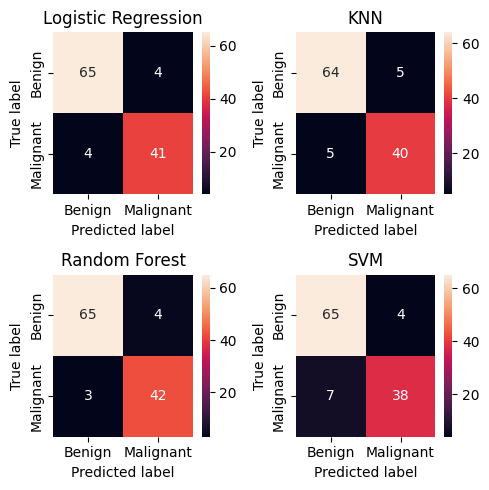

In [619]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a dictionary to map model indices to model names
model_names = {
    0: 'Logistic Regression',
    1: 'KNN',
    2: 'Random Forest',
    3: 'SVM'
}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

class_labels = ['Benign', 'Malignant']

# Loop over the four models
for i, model in enumerate(models(X_train, Y_train)):
    # Get the confusion matrix for the current model
    cm = confusion_matrix(Y_test, model.predict(X_test))
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    print(model_names[i] + " Testing Accuracy =  ", (TP + TN)/ (TP + TN + FN + FP))


    # Plot the confusion matrix as a heatmap in the current subplot
    ax = axs[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, xticklabels=class_labels, yticklabels=class_labels)

    # Set the axis labels and title for the current subplot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(model_names[i])

# Adjust the spacing between the subplots and show the plot
plt.tight_layout()
plt.show()

In [620]:
# Get all the model
model = models(X_train, Y_train)

Logistic Regression Training Accuracy = 0.967032967032967
KNN Training Accuracy = 0.9538461538461539
Random Forest Training Accuracy = 1.0
SVM Training Accuracy = 0.9252747252747253
-----------------------------------------------------


In [621]:
# Another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, model[0].predict(X_test)))
print(accuracy_score(Y_test, model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.91      0.91      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

0.9298245614035088


#Model Improvisation

In [622]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

***Logistic Regression***

In [ ]:
from sklearn.model_selection import LogisticRegression

In [624]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)

    plt.errorbar(X, Y, error, linestyle='None', marker='o')

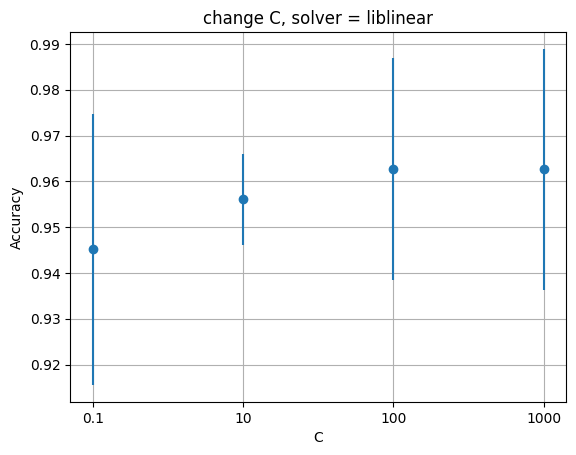

In [635]:
title = "change C, solver = liblinear, penalty = l2"
xlabel = "C"
X = []
Y = []
error = []

for C in [0.1, 10, 100, 1000]:
    logreg = LogisticRegression(C = C,solver = 'liblinear', penalty = 'l2',  random_state=2)
    mean, std = cross_validation(logreg)
    X.append(str(C))
    Y.append(mean)
    error.append(std)


plot(title, xlabel, X, Y, error)
plt.show()

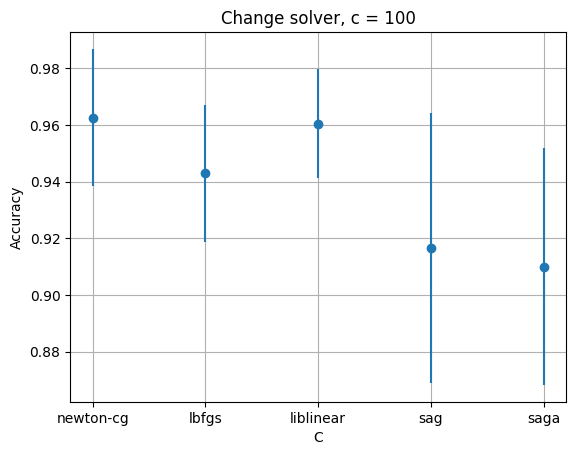

In [626]:
title = "Change solver, c = 100, penalty = l2"
xlabel = "C"
X = []
Y = []
error = []

for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    rf_clf = LogisticRegression(C = 100,solver = solver, penalty = 'l2',  random_state=2)
    mean, std = cross_validation(rf_clf)
    X.append(str(solver))
    Y.append(mean)
    error.append(std)


plot(title, xlabel, X, Y, error)
plt.show()

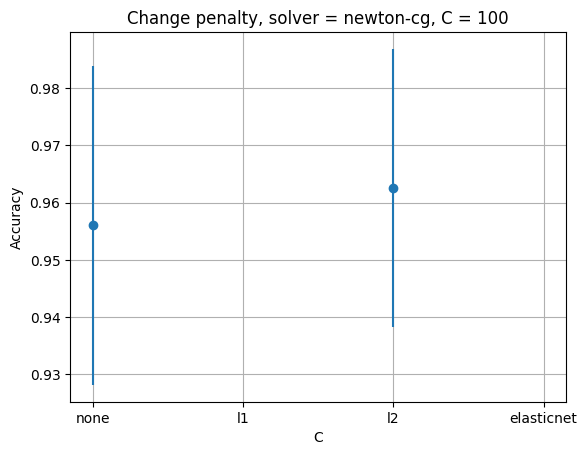

In [627]:
title = "Change penalty, solver = newton-cg, C = 100"
xlabel = "C"
X = []
Y = []
error = []

for penalty in ['none', 'l1', 'l2', 'elasticnet']:
    rf_clf = LogisticRegression(C = 100,solver = 'newton-cg', penalty = penalty,  random_state=2)
    mean, std = cross_validation(rf_clf)
    X.append(str(penalty))
    Y.append(mean)
    error.append(std)


plot(title, xlabel, X, Y, error)
plt.show()

In [636]:
# Create new Logistic Regression Model with the best params
log_best_model = LogisticRegression(C = 100, solver = 'newton-cg', penalty = 'l2', random_state = 2)
log_best_model.fit(X_train, Y_train)

print(confusion_matrix(Y_test, log_best_model.predict(X_test)))
print(classification_report(Y_test, log_best_model.predict(X_test)))
print(accuracy_score(Y_test, log_best_model.predict(X_test)))

[[66  3]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.93      0.96      0.95        45

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


***K-nearest neighbor***

Best parameters: {'n_neighbors': 11}
Best score: 0.9340659340659341


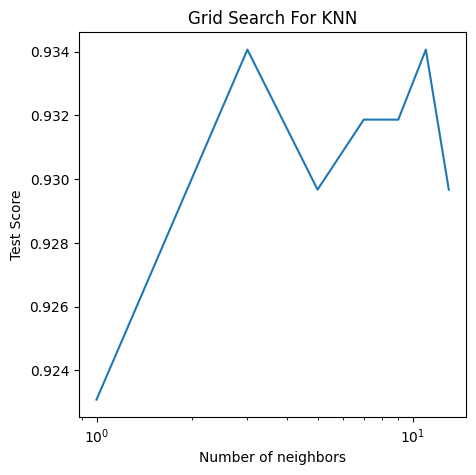

In [637]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()

params = {
    "n_neighbors" : [1, 3, 5, 7, 9, 11, 13]
}

KNN_grid_search = GridSearchCV(KNN_model, params)
KNN_grid_search.fit(X_train, Y_train)

# Print the best parameters and best score obtained from the grid search
print("Best parameters:", KNN_grid_search.best_params_)
print("Best score:", KNN_grid_search.best_score_)

# convert the results to a DataFrame
results = pd.DataFrame(KNN_grid_search.cv_results_)

# plot the mean test scores for each value of C
plt.figure(figsize=(5, 5))
sns.lineplot(data=results, x='param_n_neighbors', y='mean_test_score')

plt.xscale('log')
plt.xlabel('Number of neighbors')
plt.ylabel('Test Score')
plt.title('Grid Search For KNN')
plt.show()

In [638]:
# Create new KNN Model with the best params after doing Grid Search
KNN_best_model = KNN_grid_search.best_estimator_

KNN_best_model.fit(X_train, Y_train)

print(confusion_matrix(Y_test, KNN_best_model.predict(X_test)))
print(classification_report(Y_test, KNN_best_model.predict(X_test)))
print(accuracy_score(Y_test, KNN_best_model.predict(X_test)))

[[65  4]
 [ 4 41]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.91      0.91      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

0.9298245614035088


***Random Forest***

In [631]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)

    plt.errorbar(X, Y, error, linestyle='None', marker='o')

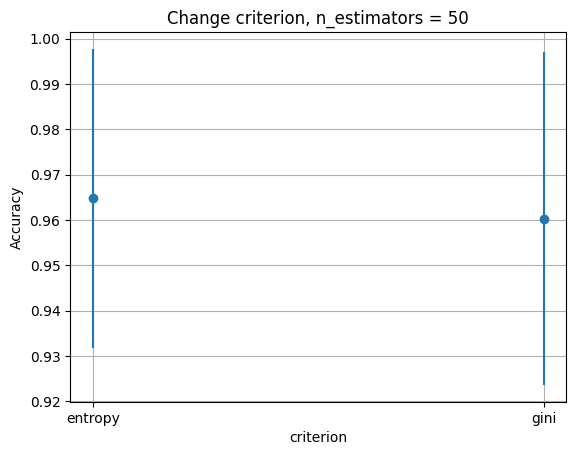

In [632]:
title = "Change criterion, n_estimators = 50"
xlabel = "criterion"
X = []
Y = []
error = []
for criterion in ["entropy", "gini"]:
    rf_clf = RandomForestClassifier(criterion=criterion, n_estimators=50, random_state=2)
    mean, std = cross_validation(rf_clf)
    X.append(str(criterion))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

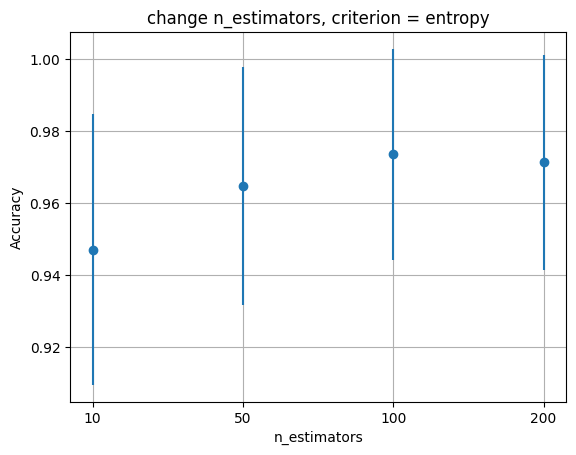

In [633]:
title = "change n_estimators, criterion = entropy"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in [10, 50, 100, 200]:
    rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators, random_state=2)
    mean, std = cross_validation(rf_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)


plot(title, xlabel, X, Y, error)
plt.show()


In [634]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 2)
rf_model.fit(X_train, Y_train)


print(confusion_matrix(Y_test, rf_model.predict(X_test)))
print(classification_report(Y_test, rf_model.predict(X_test)))
print(accuracy_score(Y_test, rf_model.predict(X_test)))

[[65  4]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.91      0.96      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

0.9473684210526315


***Support Vector Machine***

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best score: 0.956043956043956


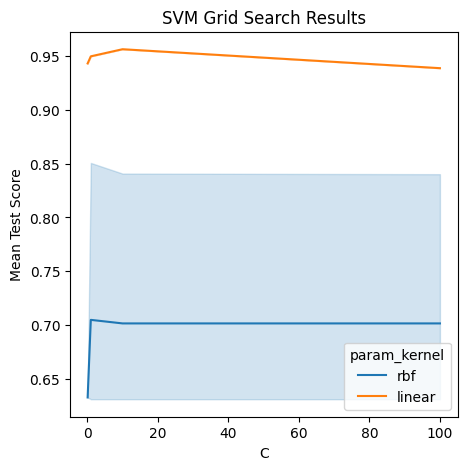

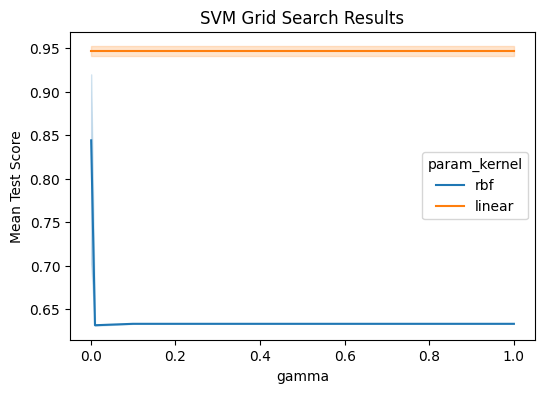

In [645]:
from sklearn.svm import SVC

SVM_model = SVC(random_state = 2)

params = {
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf','linear']
}

SVM_grid_search = GridSearchCV(SVM_model, params)
SVM_grid_search.fit(X_train, Y_train)

# Print the best parameters and best score obtained from the grid search
print("Best parameters:", SVM_grid_search.best_params_)
print("Best score:", SVM_grid_search.best_score_)

# convert the results to a DataFrame
results = pd.DataFrame(SVM_grid_search.cv_results_)

# plot the mean test scores for each value of C
plt.figure(figsize=(5, 5))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_kernel')

plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('SVM Grid Search Results')
plt.show()

plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='param_gamma', y='mean_test_score', hue='param_kernel',)
plt.xlabel('gamma')
plt.ylabel('Mean Test Score')
plt.title('SVM Grid Search Results')
plt.show()

In [646]:
from sklearn.svm import SVC

SVM_model = SVC(C = 10, gamma = 1, kernel = 'linear', random_state = 2)
SVM_model.fit(X_train, Y_train)

print(confusion_matrix(Y_test, SVM_model.predict(X_test)))
print(classification_report(Y_test, SVM_model.predict(X_test)))
print(accuracy_score(Y_test, SVM_model.predict(X_test)))

[[66  3]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.93      0.96      0.95        45

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


In [649]:
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(Y_test))]
r_auc = roc_auc_score(Y_test, r_probs)

log_auc = roc_auc_score(Y_test, log_best_model.predict(X_test))
KNN_auc = roc_auc_score(Y_test, KNN_best_model.predict(X_test))
rf_auc = roc_auc_score(Y_test, rf_model.predict(X_test))
svm_auc = roc_auc_score(Y_test, SVM_model.predict(X_test))

In [651]:
print(r_auc)
print(log_auc)
print(KNN_auc)
print(rf_auc)
print(svm_auc)

0.5
0.9560386473429953
0.9265700483091787
0.948792270531401
0.9560386473429953


In [652]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
log_fpr, log_tpr, _ = roc_curve(Y_test, log_best_model.predict(X_test))
KNN_fpr, KNN_tpr, _ = roc_curve(Y_test, KNN_best_model.predict(X_test))
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_model.predict(X_test))
svm_fpr, svm_tpr, _ = roc_curve(Y_test, SVM_model.predict(X_test))

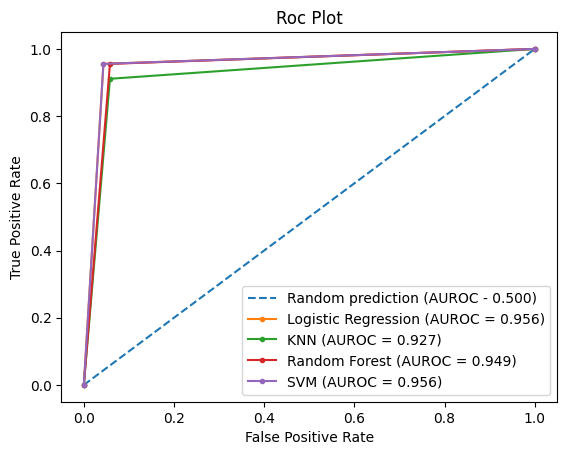

In [654]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC - %0.3f)' % r_auc)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % log_auc)
plt.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)


# Title
plt.title("Roc Plot")

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend

plt.legend()

#Show plot

plt.show()